# Part one: Digit Recognizer with traditional ML models

The Digit Recognizer challenge on Kaggle is a computer vision challenge where the goal is to classify images of hand written digits correctly.

While working through this computer vision project, I will follow a slightly adjusted Machine Learning project check list from Aurelien Geron's book "Hands-On Machine Learning with Scikit_Learn, Keras & TensorFlow". (Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 35). O'Reilly Media. Kindle Edition.)

1.	Look at the big picture
2.	Get the data
3.	Discover and visualize the data to gain insights
4.	Prepare the data for Machine Learning algorithms
5.	Select, train and fine-tune models
6.	Conclusion

As with all coding posts, the full jupyter notebook can be found in my github repo below:

<https://github.com/John-Land/Digit-Recognizer-ML-competition-Kaggle>

In this first attempt we will use traditional Machine Learning algorithms to tackle the Digit Recognizer challenge. In part two below, we will use Deep Learning with tensorflow to try and improve on our results with a fully connected Neural Network and with a Convolutional Neural Network.

Part two can be found under below links.

Project page: <https://john-land.github.io/Digit-Recognizer-ML-competition-Kaggle-with-deep-learning-tensorflow>

Github: <https://github.com/John-Land/Digit-Recognizer-ML-competition-Kaggle-with-deep-learning-tensorflow>

## 1. Look at the big picture

Before looking deeper into the dataset, it will first be helpful to understand how image features are represented as numbers. The Kaggle page has a good expiation in the data tab.

The MNIST dataset we will be working on consist of 28 x 28 pixel grey-scale images (black and white images). Therefore one image consists of 28 x 28 = 784 pixels. Each pixel is considered a unique feature of an image, therefore each image in our dataset has 784 features. The values of each pixel range from 0 to 255 inclusive, with higher values indicating darker coloured pixels.

Note that due to the fact that these images are grey-scale images, we have 28 x 28 x 1 = 784 pixels per image. If these were coloured RGB images, one image would have three difference values for each pixel (red, green and blue pixel intensity values), and the features space per image would be 28 X 28 X 3 pixels.


## 2. Get the data

The data is provided on the Kaggle challenge page. <https://www.kaggle.com/c/digit-recognizer/data>

We will first import the data and check for any missing values and some basic information.

In [26]:
# linear algebra
import numpy as np     

# data processing
import pandas as pd    

#data visualization
import matplotlib.pyplot as plt 

In [27]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

training_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.1. Data Structure

In [28]:
training_data.shape, testing_data.shape

((42000, 785), (28000, 784))

Training data: 42000 rows and 785 columns -> Data on 42000 images, 784 pixel values and 1 label per image.

Testing data: 28000 rows and 784 columns -> Data on 28000 images, 784 pixel values and no labels per image.

Our predictions for the labels in the test set will be submitted to Kaggle later.

In [29]:
print("Training Data missing values:"), training_data.isna().sum()

Training Data missing values:


(None,
 label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64)

In [30]:
print("Testing Data missing values:"), testing_data.isna().sum()

Testing Data missing values:


(None,
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 784, dtype: int64)

There are no missing values in the training and test set.

## 3. Discover and visualize the data to gain insights

The MNIST dataset we will be working on consist of 28 x 28 pixel grey-scale images (black and white images). Each row in our data set consists of all 784 pixels of one image and the label of the image.

In [52]:
training_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The below code visualizes one individual image by first reshaping the row in the data table for the individual image back into its original 28x28x1 pixel matrix, and then visualizing the pixel matrix for the image with matplotlib.

original image is a: 0


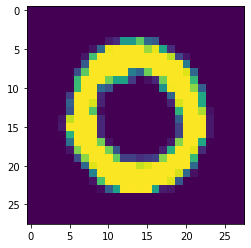

In [31]:
photo_id = 1
image_28_28 = np.array(training_data.iloc[photo_id, 1:]).reshape(28, 28)
plt.imshow(image_28_28)
print("original image is a:", training_data.iloc[photo_id, 0])

original image is a: 7


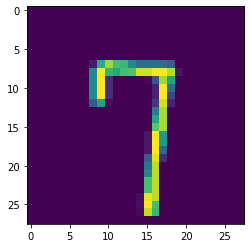

In [32]:
photo_id = 50
image_28_28 = np.array(training_data.iloc[photo_id, 1:]).reshape(28, 28)
plt.imshow(image_28_28)
print("original image is a:", training_data.iloc[photo_id, 0])

In [53]:
X_train = training_data.iloc[:, 1:]
Y_train = training_data[['label']]
X_test = testing_data
X_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
Y_train.head(3)

,label
0,1
1,0
2,1


## 4. Prepare the data for Machine Learning algorithms

Before training our Machine learning algorithms we will do three pre-processing steps.

1.	The data will be scaled with the MinMaxScaler so all features fall in a range between 0 and 1.
2.	We will use PCA to reduce the feature space considerable, but still keeping 95% of the variance in the data, ensuring that not too much information is lost while reducing the feature space. This reduction in feature space will help reduce training time later.
3.	After PCA, we will use the StandardScaler to ensure that all new features from PCA have mean 0 and standard deviation 1.


In [55]:
from sklearn.preprocessing import MinMaxScaler

#fit standard scaler to training set
scaler = MinMaxScaler().fit(X_train)

#transform training set
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

#transform test set
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,svd_solver = 'full').fit(X_train_norm)
X_train_reduced = pd.DataFrame(pca.transform(X_train_norm))
X_test_reduced = pd.DataFrame(pca.transform(X_test_norm))
X_train_reduced.head(5)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,-2.594493,-2.742397,0.718753,0.472985,-0.317968,1.919458,-2.680278,0.335527,1.366855,0.795994,...,-0.067206,-0.228756,0.062035,-0.036426,-0.072468,-0.072641,-0.022245,-0.132045,-0.213704,-0.038427
1,6.672360,-1.413927,-1.967865,1.315386,-1.734820,2.895702,2.564217,-0.692553,-0.029491,0.266064,...,-0.170333,-0.142983,0.160735,-0.041835,0.259718,0.126622,0.042587,-0.072806,0.046261,0.160544
2,-3.478017,-1.152023,0.263354,0.306917,-1.857709,-1.268787,1.716859,-1.197560,-0.765865,-0.100494,...,-0.054321,0.147798,0.115108,-0.050983,-0.236928,0.021208,0.044639,0.051697,-0.053665,0.080733
3,-0.650022,1.177187,-0.251551,2.979240,-1.669978,0.617218,-1.192546,1.083957,-0.179872,-1.158735,...,-0.018113,0.267320,0.372053,-0.061314,-0.377481,0.186922,-0.163961,-0.041613,-0.080466,0.046466
4,7.543960,-1.761384,-2.151424,0.739431,-2.555829,3.882603,2.213753,-1.003590,0.489861,0.696341,...,0.199446,0.042179,0.039327,0.088611,0.384118,-0.297355,0.003738,0.197964,-0.175501,-0.041155


In [57]:
X_train_reduced.shape

(42000, 154)

PCA has reduced the feature space from 784 to 154 features, but still retained 95% of the variance and therefore most of the information in the data.

In [58]:
from sklearn.preprocessing import StandardScaler

#fit standard scaler to training set
scaler = StandardScaler().fit(X_train_reduced)

#transform training set
X_train = pd.DataFrame(scaler.transform(X_train_reduced), columns = X_train_reduced.columns)

#transform test set
X_test = pd.DataFrame(scaler.transform(X_test_reduced), columns = X_test_reduced.columns)

In [59]:
X_train.describe().round(1)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0
mean,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.9,-2.9,-3.1,-3.5,-3.1,-3.2,-3.3,-3.4,-3.5,-3.6,...,-4.0,-4.6,-4.8,-5.1,-4.8,-4.4,-4.7,-4.4,-4.6,-4.5
25%,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.6,...,-0.7,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.7,-0.6,-0.6
50%,-0.1,-0.2,0.0,0.0,0.0,0.0,-0.0,-0.1,-0.1,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
75%,0.6,0.8,0.7,0.6,0.7,0.7,0.7,0.6,0.7,0.7,...,0.6,0.6,0.6,0.6,0.6,0.7,0.6,0.7,0.6,0.6
max,4.1,3.0,3.2,3.6,3.3,3.3,3.8,3.8,4.9,3.6,...,4.7,5.4,5.1,5.5,5.5,4.4,5.5,4.7,4.6,5.1


### 5. Select, train and fine-tune models

Now it's finally time to train our machine learning models.
As this is a classification task, we will take into considering below models.
1. Naive Bayes
2. LDA
3. QDA
4. Logistic Regression
5. Decision Tree
6. Ensemble of models 1-5

As we have no labels on the testing data, we will use the training data with 5 fold cross validation, to get an estimation of the out of sample accuracy. The model with the highest mean accuracy on all cross validation sets will be selected for prediction and submission to kaggle.

In [60]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import time

start = time.process_time()

clf_dummy = DummyClassifier(strategy = 'most_frequent')
cv_score = cross_val_score(clf_dummy, X_train, Y_train, cv=5).round(3).mean()


end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best score (accuracy): ', cv_score.round(3))

training time in seconds: 0.28
training time in minutes: 0.0
Grid best score (accuracy):  0.112


In [90]:
from sklearn.naive_bayes import GaussianNB

start = time.process_time()

clf1 = GaussianNB()
clf1.fit(X_train, Y_train.values.ravel());
cv_score_clf1 = cross_val_score(clf1, X_train, Y_train.values.ravel(), cv=5).mean()

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best score (accuracy): ', cv_score_clf1.round(3))

training time in seconds: 2.86
training time in minutes: 0.05
Grid best score (accuracy):  0.857


In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start = time.process_time()

clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, Y_train.values.ravel());
cv_score_clf2 = cross_val_score(clf2, X_train, Y_train.values.ravel(), cv=5).mean()

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best score (accuracy): ', cv_score_clf2.round(3))

training time in seconds: 11.95
training time in minutes: 0.2
Grid best score (accuracy):  0.869


In [92]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.process_time()

clf3 = QuadraticDiscriminantAnalysis()
clf3.fit(X_train, Y_train.values.ravel());
cv_score_clf3 = cross_val_score(clf3, X_train, Y_train.values.ravel(), cv=5).mean().round(3)

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best score (accuracy): ', cv_score_clf3.round(3))

training time in seconds: 11.22
training time in minutes: 0.19
Grid best score (accuracy):  0.945


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

start = time.process_time()

clf4 = LogisticRegression(max_iter = 10000)
grid_values = {'C': [0.01, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf4 = GridSearchCV(clf4, param_grid = grid_values, cv=5)
grid_clf4.fit(X_train, Y_train.values.ravel());

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best parameter (max. accuracy): ', grid_clf4.best_params_)
print('Grid best score (accuracy): ', grid_clf4.best_score_.round(3))

training time in seconds: 453.69
training time in minutes: 7.56
Grid best parameter (max. accuracy):  {'C': 100}
Grid best score (accuracy):  0.919


In [65]:
from sklearn.tree import DecisionTreeClassifier

start = time.process_time()

clf5 = DecisionTreeClassifier()
grid_values = {'max_depth': [11, 13, 15, 17]}

# default metric to optimize over grid parameters: accuracy
grid_clf5 = GridSearchCV(clf5, param_grid = grid_values, cv=5)
grid_clf5.fit(X_train, Y_train.values.ravel())

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best parameter (max. accuracy): ', grid_clf5.best_params_)
print('Grid best score (accuracy): ', grid_clf5.best_score_.round(3))

training time in seconds: 260.5
training time in minutes: 4.34
Grid best parameter (max. accuracy):  {'max_depth': 15}
Grid best score (accuracy):  0.821


In [66]:
from sklearn.ensemble import RandomForestClassifier

start = time.process_time()


clf6 = RandomForestClassifier()
grid_values = {'max_depth': [11, 13, 15, 17], 'n_estimators': [75, 100, 125, 150]}

# default metric to optimize over grid parameters: accuracy
grid_clf6 = GridSearchCV(clf6, param_grid = grid_values, cv=5)
grid_clf6.fit(X_train, Y_train.values.ravel())

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best parameter (max. accuracy): ', grid_clf6.best_params_)
print('Grid best score (accuracy): ', grid_clf6.best_score_.round(3))

training time in seconds: 4913.48
training time in minutes: 81.89
Grid best parameter (max. accuracy):  {'max_depth': 17, 'n_estimators': 150}
Grid best score (accuracy):  0.941


In [67]:
from sklearn.ensemble import VotingClassifier

start = time.process_time()

eclf = VotingClassifier(estimators=[('GaussianNB', clf1),
                                    ('lda', clf2), 
                                    ('qda', clf3), 
                                    ('lr', clf4), 
                                    ('tree', clf5), 
                                    ('rf', clf6)],
                         voting='hard')
    
cv_score = cross_val_score(eclf, X_train, Y_train.values.ravel(), cv=5).mean().round(3)

end = time.process_time()

print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))
print('Grid best score (accuracy): ', cv_score.round(3))

training time in seconds: 494.3
training time in minutes: 8.24
Grid best score (accuracy):  0.94


### 6. Conclusion

Based on the average cross validation error from five-fold cross validation, we get the below accuracies for each model.

In [69]:
classifiers = ['GaussianNB', 
               'LinearDiscriminantAnalysis',
               'QuadraticDiscriminantAnalysis',
               'LogisticRegression', 
               'DecisionTreeClassifier', 
               'RandomForestClassifier', 
               'VotingClassifier']

scores = [cv_score_clf1.round(3), 
          cv_score_clf2.round(3), 
          cv_score_clf3.round(3), 
          grid_clf4.best_score_.round(3), 
          grid_clf5.best_score_.round(3), 
          grid_clf6.best_score_.round(3),
          cv_score.round(3)]

model_scores = pd.DataFrame(data= scores, columns = ['CV_Accuracy'], index = classifiers)
model_scores

,CV_Accuracy
GaussianNB,0.857
LinearDiscriminantAnalysis,0.869
QuadraticDiscriminantAnalysis,0.945
LogisticRegression,0.919
DecisionTreeClassifier,0.821
RandomForestClassifier,0.941
VotingClassifier,0.940


Based on the highest cross validation accuracy of 94.45%, we will use the QuadraticDiscriminantAnalysis classifier to submit our predictions to Kaggle.

In [95]:
predictions = clf3.predict(X_test)
ImageId = np.array(range(1, X_test.shape[0]+1, 1))

output = pd.DataFrame({'ImageId': ImageId, 'Label': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
